# Numerical data processing

Documentation of interest:

1. [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)
2. [Map data to a normal distribution](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html)

In [1]:
import timeit # Used to measure the execution time of the models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

For more information about the dataset used, visit its [documentation website](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html).

**max-min scaling** is better used for uniform distributions. 

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

In [8]:
# max-min scaling
max_raw = max(raw)
min_raw = min(raw)
scaled = (2 * raw - max_raw - min_raw) / (max_raw - min_raw)

Let's see the distribution differences between the original and scaled data.

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

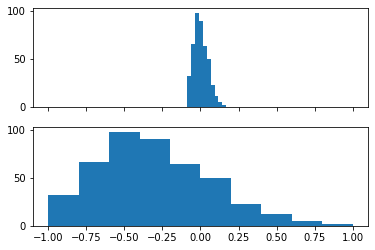

In [5]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].hist(raw)
axs[1].hist(scaled)

In [6]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [7]:
raw_time = timeit.timeit(train_raw, number=100)
scaled_time = timeit.timeit(train_scaled, number=100)
print('train raw: {}'.format(raw_time))
print('train scaled: {}'.format(scaled_time))

train raw: 0.07802291700500064
train scaled: 0.05712110000604298


## Non-linear transformation

In [9]:
cars_data = pd.read_csv('./cars.csv')

<AxesSubplot:>

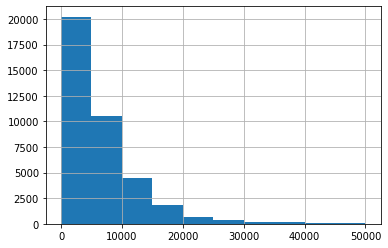

In [11]:
cars_data['price_usd'].hist()

<AxesSubplot:>

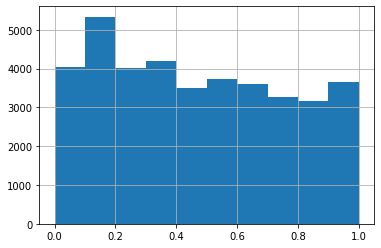

In [16]:
p = 10000
cars_data['price_usd'].apply(lambda x: np.tanh(x/p)).hist()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=36c54c60-6e31-4b99-9692-c642be612235' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>